In [1]:
import numpy as np
import scipy as sp
from scipy.io import wavfile
import lovely_numpy as ln
import matplotlib.pyplot as plt
import json_tricks

In [2]:
sample_rate, data = wavfile.read('sample.wav')
wavfile.write('original.wav', sample_rate, data)

# data = data.mean(axis=1)

In [3]:
print("ORIGINAL DATA")
print(ln.lovely(data))

data = data[:, 0] + data[:, 1] * 1.j
wavfile.write('original.wav', sample_rate, np.array([data.real, data.imag]).T)

ORIGINAL DATA
array[191027, 2] i16 n=382054 (0.7Mb) x∈[-20505, 26899] μ=-4.501 σ=2.685e+03


In [4]:
from scipy.fft import fft, ifft

def compress(input, frequencies=1000):
    a = fft(input)
    a[frequencies:] = 0  # Zero out frequencies beyond the threshold
    return a

def decompress(input, data_len):
    res = ifft(input)
    return np.real(res).astype(np.int16)


In [20]:
compressed = compress(data, frequencies=20000)

json_tricks.dump(compressed, '.answer.json')

decompressed = decompress(compressed,len(data))

print(ln.lovely(data))
print(ln.lovely(decompressed))

array([-25.-25.j, -24.-24.j, -23.-23.j, ..., -34.-34.j, -35.-35.j,
       -31.-31.j])
array[191027] i16 0.4Mb x∈[-16262, 19016] μ=-4.480 σ=1.874e+03


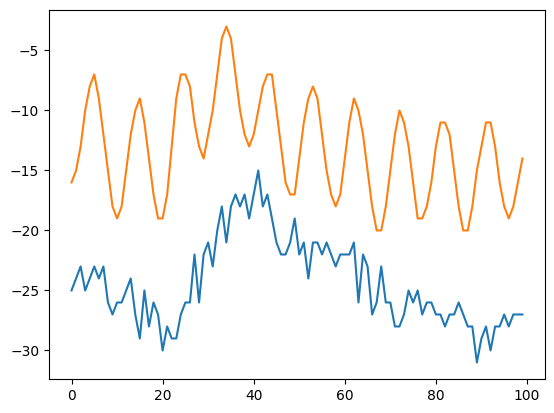

In [21]:
plt.plot(data.real[:100])
plt.plot(decompressed.real[:100])

In [22]:
wavfile.write('decompressed.wav', sample_rate, np.array([decompressed.real, decompressed.imag]).T.astype('int16'))

In [23]:
wavfile.write('original.wav', sample_rate, np.array([data.real, data.imag]).T.astype('int16'))

In [24]:
from IPython.display import Audio

Audio("decompressed.wav")

In [25]:
from IPython.display import Audio

Audio("sample.wav")